# Problem Statement
P2 Butterfly Species Richness (UL) 
Data for the Butterfly Species Richness is provided in the file ButterflyData.ods 
available in Moodle.  
The goal is to understand the distribution of butterfly species richness from an USL 
perspective. In particular, understanding what features are important for determining the 
distribution. Using the location name, one can create a large number of features, and 
therefore a very high dimensional feature space. Unsupervised learning methods can be 
used reduce the dimensionality of this space, and therefore understand the correlations 
between these features and butterfly richness. Examples of techniques might include, 
PCA or autoencoders. 

### Group B2 - Natchira Chongsawad, Thomas Barrick, and Niharika Vijay Patil

## *We are trying to understand what features (environmental and geographical) contribute most to butterfly species richness (the diversity or number of butterfly species)*

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
file_path = "butterfly-data.csv"  
df = pd.read_csv(file_path)

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.drop(columns=['number'], inplace=True)

In [5]:
df.head(5)

,Country,the average Annual Relative Humidity,plant species,Köppen-Geiger Climate Classification,Number of species,area,latitude,island,Metres from Sea Level,% Of landmass used for agriculture,Amount of forest lost 2023,% of urbanisation,The population density [per Km2]
0,Austria,75.8,3601,C,197,83858,48.20,0,910,31.48,14600.0,58.3,111.0
1,Belgium,83.4,2117,C,88,30510,50.85,0,181,44.57,22200.0,98.0,388.0
2,Bulgaria,77.9,2049,C,211,110994,42.68,0,472,46.26,42300.0,75.0,62.0
3,Cyprus,61.4,"1,738",C,48,9251,35.17,1,91,13.32,48.0,66.8,148.0
4,Czech Republic,77.0,"2,689",C,140,78866,50.08,0,433,45.75,5700.0,73.8,137.0


In [6]:
categorical_columns = [
        'Köppen-Geiger Climate Classification'
    ]

In [7]:
numerical_columns = [
    'the average Annual Relative Humidity',
    'plant species',
    'Number of species',
    'area',
    'latitude',
    'Metres from Sea Level',
    '% Of landmass used for agriculture',
    'Amount of forest lost 2023',
    '% of urbanisation',
]

In [8]:
numerical_columns = [col for col in numerical_columns if col in df.columns]

In [9]:
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [10]:
if 'Köppen-Geiger Climate Classification' in df.columns:
    le = LabelEncoder()
    df['Köppen-Geiger Climate Classification'] = le.fit_transform(
        df['Köppen-Geiger Climate Classification'].astype(str)
    )

In [11]:
scaler = StandardScaler()
if numerical_columns:
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [12]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [13]:
skewness = df['Number of species'].skew()
print(f"Skewness: {skewness}")

Skewness: 1.8664671120426666


### A skewness value of 1.866 indicates that the distribution is positively skewed. Most butterfly species are found in small numbers. But a few species are found in very large numbers, which makes it right skewed.

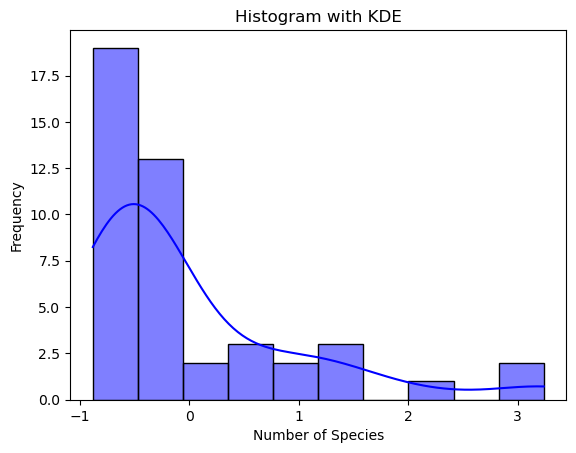

In [14]:
sns.histplot(df['Number of species'], kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Histogram with KDE')
plt.xlabel('Number of Species')
plt.ylabel('Frequency')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

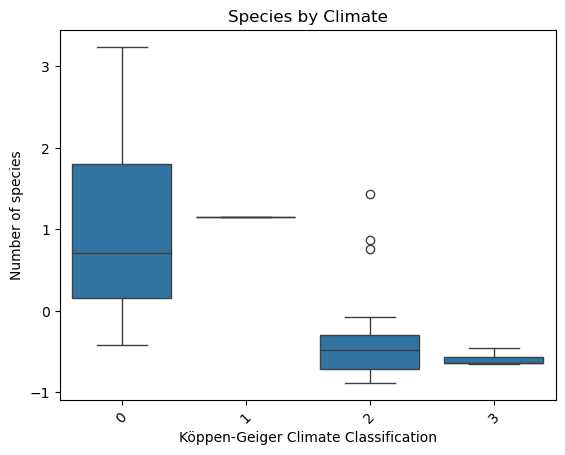

In [15]:
sns.boxplot(x='Köppen-Geiger Climate Classification', y='Number of species', data=df)
plt.title('Species by Climate')
plt.xticks(rotation=45)

Text(0, 0.5, 'Number of Species')

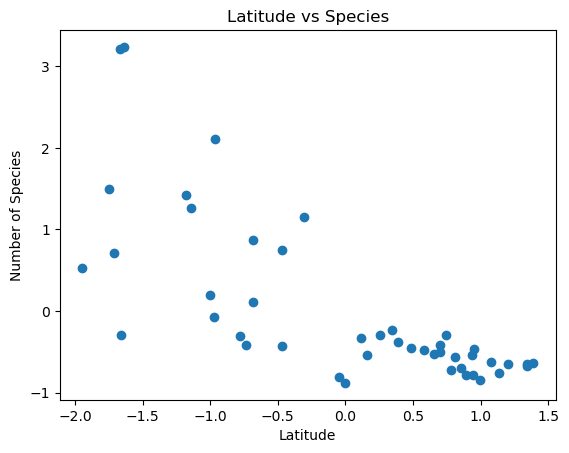

In [16]:
plt.scatter(df['latitude'], df['Number of species'])
plt.title('Latitude vs Species')
plt.xlabel('Latitude')
plt.ylabel('Number of Species')

The scatter plot shows that as you move further from the equator (higher latitudes), the number of butterfly species decreases. In lower latitudes (closer to the equator), there are more butterfly species, and the numbers vary a lot. In higher latitudes (further from the equator), species counts are lower and more consistent.

This supports the idea that biodiversity is generally higher near the equator, and that temperature and climate are key factors affecting where butterflies live.

Text(0.5, 1.0, 'Feature Correlations')

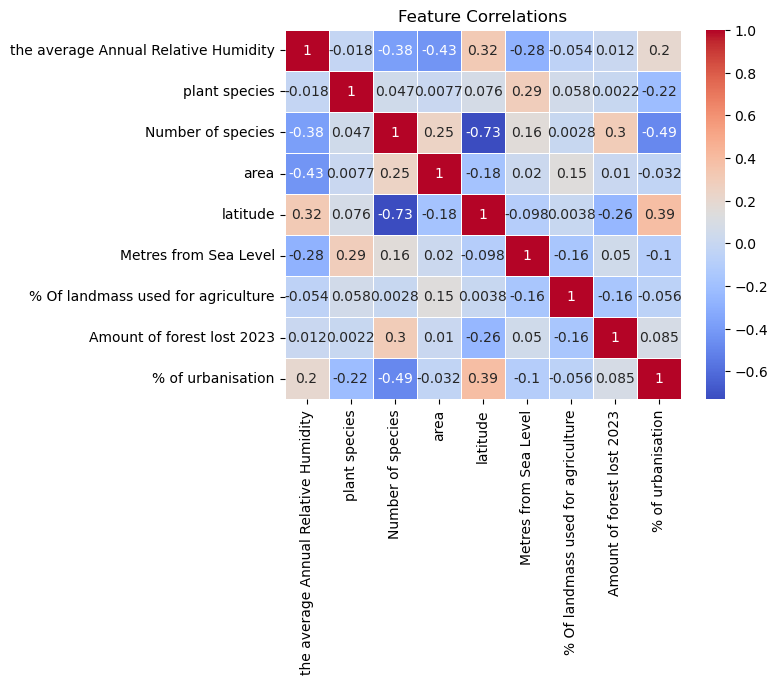

In [17]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations')

1. Strong Negative Correlation (-0.73) with Latitude: As latitude increases, number of species decreases. Suggests butterflies prefer warmer, lower-latitude regions.
--------------------------------------------------------------
2. Moderate Negative Correlation (-0.38) with Humidity: Higher humidity associated with fewer species. Could indicate butterflies prefer moderately dry conditions.
--------------------------------------------------------------
3. Positive Correlation (0.30) with Forest Loss: relationship suggesting areas with more forest loss have more species. Might indicate human activity or land use changes impact.
--------------------------------------------------------------
4. Weak Positive Correlation (0.25) with Area: Larger areas tend to have slightly more species. Supports basic ecological principles about habitat size.
--------------------------------------------------------------
5. Agricultural land shows very weak correlation (0.0028) with species numbers.
--------------------------------------------------------------
6. Elevation has weak positive correlation(0.16) with species richness.
--------------------------------------------------------------

Text(0, 0.5, 'Number of Species')

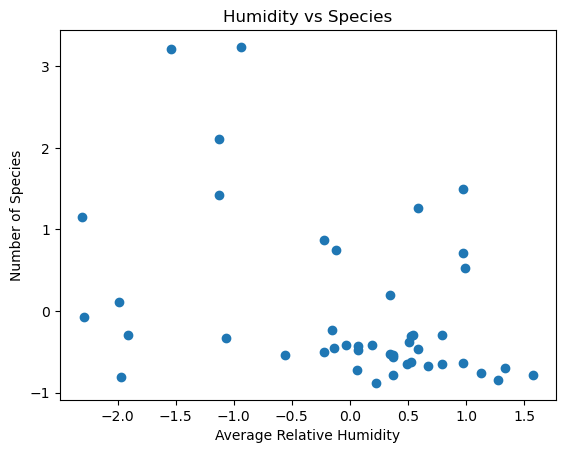

In [18]:
plt.scatter(df['the average Annual Relative Humidity'], df['Number of species'])
plt.title('Humidity vs Species')
plt.xlabel('Average Relative Humidity')
plt.ylabel('Number of Species')


There’s a weak negative relationship meaning species counts tend to be a bit lower when humidity is higher, but it’s not as strong. Overall, this shows that butterflies prefer slightly dry conditions, and while humidity does matter, it’s not as big of a factor as latitude in determining where species live.

Text(0, 0.5, 'Number of Species')

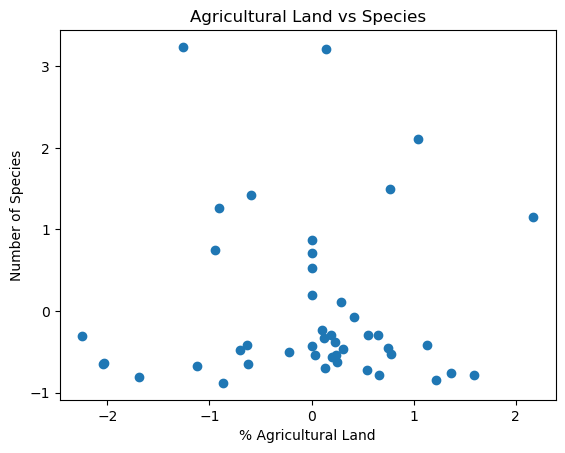

In [19]:
plt.scatter(df['% Of landmass used for agriculture'], df['Number of species'])
plt.title('Agricultural Land vs Species')
plt.xlabel('% Agricultural Land')
plt.ylabel('Number of Species')

The scatter plot shows no clear relationship between agricultural land and butterfly species, with points scattered widely and a very weak correlation (0.0028). This suggests that agricultural land use isn’t a strong factor in species diversity, and other factors like latitude and humidity are likely more important.

In [20]:
print(df[numerical_columns].describe())

       the average Annual Relative Humidity  plant species  Number of species  \
count                          4.500000e+01   4.500000e+01       4.500000e+01   
mean                           4.934325e-17   1.307596e-16       5.181041e-17   
std                            1.011300e+00   3.370999e-01       1.011300e+00   
min                           -2.303618e+00  -1.565240e+00      -8.815648e-01   
25%                           -2.270815e-01   1.221245e-16      -6.408844e-01   
50%                            3.447185e-01   1.221245e-16      -4.159005e-01   
75%                            5.854763e-01   1.221245e-16       1.910328e-01   
max                            1.578603e+00   1.446540e+00       3.238780e+00   

               area      latitude  Metres from Sea Level  \
count  4.500000e+01  4.500000e+01           4.500000e+01   
mean   7.401487e-18 -3.083953e-16           8.598786e-17   
std    1.011300e+00  1.011300e+00           8.790491e-01   
min   -3.639846e-01 -1.946218e

In [21]:
numerical_columns.remove('% of urbanisation')

In [22]:
df[numerical_columns]

,the average Annual Relative Humidity,plant species,Number of species,area,latitude,Metres from Sea Level,% Of landmass used for agriculture,Amount of forest lost 2023
0,0.194245,1.446540e+00,-0.413284,-0.294990,0.703388,2.985137e+00,-6.290309e-01,-2.470387e-01
1,1.337845,-1.966515e-01,-0.698438,-0.339048,0.855368,-5.370035e-01,1.353064e-01,-2.282241e-01
2,0.510239,-2.719461e-01,-0.376659,-0.272580,0.386812,8.689537e-01,2.339870e-01,-1.784643e-01
3,-1.972576,1.221245e-16,-0.803082,-0.356606,-0.043892,-9.718356e-01,-1.689410e+00,-2.830639e-01
4,0.374813,1.221245e-16,-0.562402,-0.299113,0.811208,6.805265e-01,2.042077e-01,-2.690717e-01
5,1.127182,1.221245e-16,-0.763841,-0.327500,1.134666,-1.247229e+00,1.363268e+00,-2.811552e-01
6,0.675761,1.221245e-16,-0.672277,-0.326802,1.346864,-1.116780e+00,-1.119515e+00,-2.061911e-01
7,0.976708,1.221245e-16,-0.640884,-0.084984,1.389877,-6.191384e-01,-2.031581e+00,-2.482766e-01
8,0.540334,1.221245e-16,-0.290328,0.091130,0.741240,4.003013e-01,5.510498e-01,-1.891094e-01
9,0.585476,1.221245e-16,-0.462990,-0.069274,0.951144,-1.408231e-01,3.063918e-01,-2.235204e-01


In [23]:
def covariance_matrix(data):
    return np.cov(data, rowvar=False)

def compute_eigen(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    return eigenvalues, eigenvectors

def project_data(data, eigenvectors, k):
    return np.dot(data, eigenvectors[:, :k])

def pca(data, k):

    cov_matrix = covariance_matrix(data)
    eigenvalues, eigenvectors = compute_eigen(cov_matrix)
    reduced_data = project_data(data, eigenvectors, k)
    return reduced_data, eigenvalues, eigenvectors

def plot_explained_variance(eigenvalues):
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    for i, variance in enumerate(explained_variance_ratio):
        print(f"Principal Component {i+1}: {variance*100:.2f}% explained variance")
    
    plt.figure(figsize=(8, 5))

    x_labels = np.arange(1, len(explained_variance_ratio) + 1) 

    plt.plot(x_labels, cumulative_variance_ratio, marker='o', linestyle='--', label="Cumulative Variance")
    plt.bar(x_labels, explained_variance_ratio, alpha=0.5, label="Variance Ratio")
    plt.axhline(y=0.9, color='r', linestyle='-')
    plt.xticks(x_labels)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend()
    plt.show()

Principal Component 1: 33.74% explained variance
Principal Component 2: 19.08% explained variance
Principal Component 3: 16.13% explained variance
Principal Component 4: 11.18% explained variance
Principal Component 5: 9.39% explained variance
Principal Component 6: 7.46% explained variance
Principal Component 7: 1.65% explained variance
Principal Component 8: 1.38% explained variance


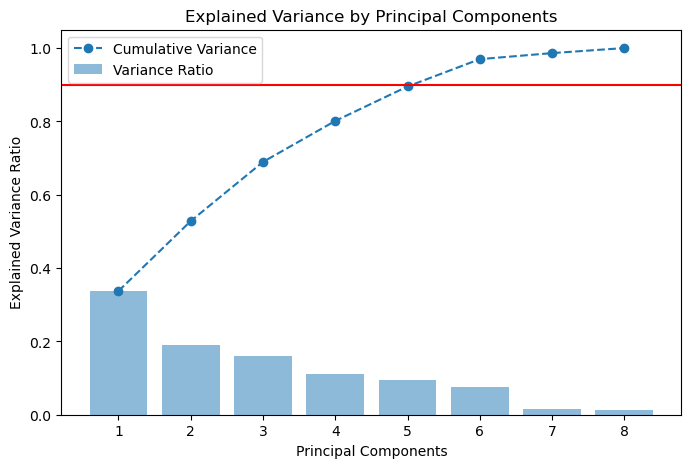

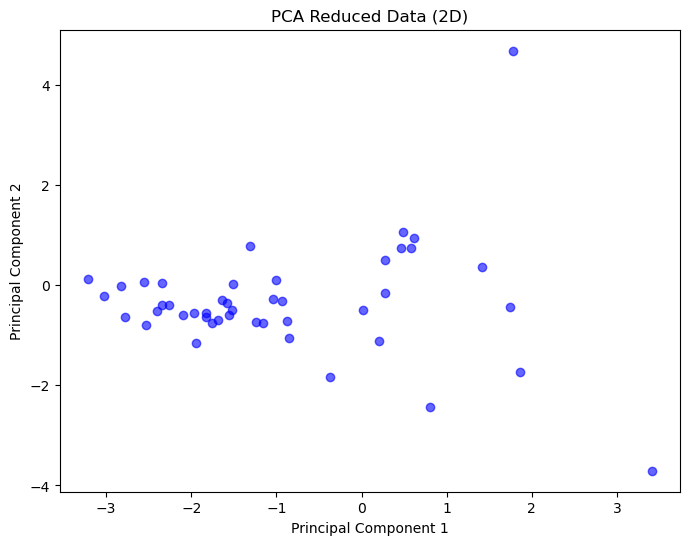

In [24]:
numerical_columns = [col for col in numerical_columns if col != 'Number of species']
numerical_columns.append('Köppen-Geiger Climate Classification')
data_for_pca = df[numerical_columns].values
k = 2  
reduced_data, eigenvalues, eigenvectors = pca(data_for_pca, k)

plot_explained_variance(eigenvalues)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.6)
plt.title('PCA Reduced Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
if 'Country' in df.columns:
    countries = df['Country']
    
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
if 'Country' in df.columns:
    pca_df['Country'] = countries.values

print(pca_df.head())

        PC1       PC2         Country
0 -1.516872 -0.486162         Austria
1 -2.350350  0.051632         Belgium
2 -1.583268 -0.357580        Bulgaria
3 -0.871683 -0.723544          Cyprus
4 -1.829933 -0.546556  Czech Republic


In [26]:
pca_df

,PC1,PC2,Country
0,-1.516872,-0.486162,Austria
1,-2.350350,0.051632,Belgium
2,-1.583268,-0.357580,Bulgaria
3,-0.871683,-0.723544,Cyprus
4,-1.829933,-0.546556,Czech Republic
5,-2.408341,-0.522598,Denmark
6,-2.556816,0.071133,Estonia
7,-3.214565,0.132502,Finland
8,-1.686402,-0.690990,France
9,-1.971454,-0.546992,Germany


In [27]:
def get_dominant_features(eigenvectors, feature_names, top_n=3):
    dominant_features = {}
    for i, pc in enumerate(eigenvectors.T): 
        abs_pc = np.abs(pc)  
        top_indices = abs_pc.argsort()[::-1][:top_n]  
        top_features = [(feature_names[idx], pc[idx]) for idx in top_indices]
        dominant_features[f'PC{i+1}'] = top_features
    return dominant_features

feature_names = numerical_columns

dominant_features = get_dominant_features(eigenvectors, feature_names, top_n=3)

rows = []
for pc, features in dominant_features.items():
    for feature, contribution in features:
        rows.append({'Principal Component': pc, 'Feature': feature, 'Contribution': contribution})
    

dominant_features_df = pd.DataFrame(rows)

print(dominant_features_df)

   Principal Component                               Feature  Contribution
0                  PC1  Köppen-Geiger Climate Classification     -0.576248
1                  PC1                              latitude     -0.567417
2                  PC1                                  area      0.370180
3                  PC2            Amount of forest lost 2023      0.564653
4                  PC2  the average Annual Relative Humidity      0.483423
5                  PC2                                  area     -0.481025
6                  PC3    % Of landmass used for agriculture      0.642799
7                  PC3                 Metres from Sea Level     -0.547198
8                  PC3  the average Annual Relative Humidity      0.421101
9                  PC4                                  area      0.592318
10                 PC4            Amount of forest lost 2023      0.575057
11                 PC4                 Metres from Sea Level     -0.388295
12                 PC5   

In [28]:
final_df = pd.concat([df[['Country']], pca_df], axis=1)
print(final_df.head())

          Country       PC1       PC2         Country
0         Austria -1.516872 -0.486162         Austria
1         Belgium -2.350350  0.051632         Belgium
2        Bulgaria -1.583268 -0.357580        Bulgaria
3          Cyprus -0.871683 -0.723544          Cyprus
4  Czech Republic -1.829933 -0.546556  Czech Republic


In [29]:
def k_means_clustering(data, k, max_iters=250):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        clusters = np.argmin(distances, axis=0)

        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

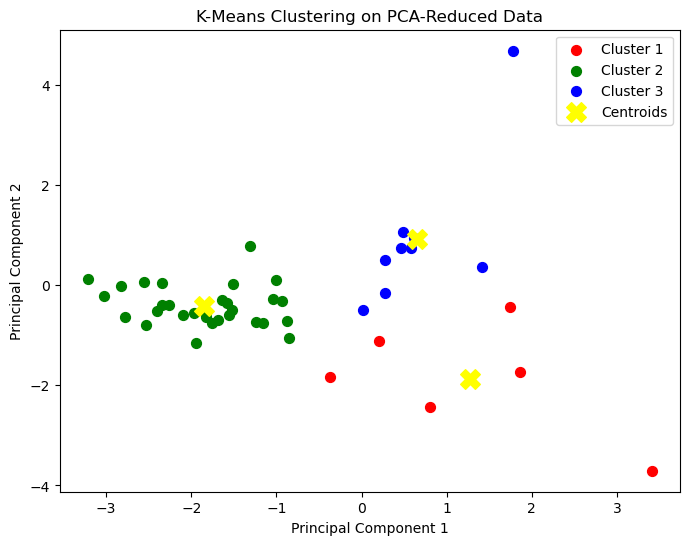

        PC1       PC2         Country  Cluster
0 -1.516872 -0.486162         Austria        1
1 -2.350350  0.051632         Belgium        1
2 -1.583268 -0.357580        Bulgaria        1
3 -0.871683 -0.723544          Cyprus        1
4 -1.829933 -0.546556  Czech Republic        1


In [30]:
k = 3

clusters, centroids = k_means_clustering(reduced_data, k)

pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'black', 'aqua']
for cluster in range(k):
    cluster_data = reduced_data[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=colors[cluster], label=f'Cluster {cluster + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

print(pca_df.head())

In [31]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(reduced_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5577


In [32]:
pca_df

,PC1,PC2,Country,Cluster
0,-1.516872,-0.486162,Austria,1
1,-2.350350,0.051632,Belgium,1
2,-1.583268,-0.357580,Bulgaria,1
3,-0.871683,-0.723544,Cyprus,1
4,-1.829933,-0.546556,Czech Republic,1
5,-2.408341,-0.522598,Denmark,1
6,-2.556816,0.071133,Estonia,1
7,-3.214565,0.132502,Finland,1
8,-1.686402,-0.690990,France,1
9,-1.971454,-0.546992,Germany,1


In [33]:
def AutoEncoders(data, num_species, numbers, countries, df):
    input_dim = data.shape[1]
    latent_dim = 3 

    def initialize_weights(input_dim, latent_dim):
        np.random.seed(42)
        weights = {
            'encoder': np.random.randn(input_dim, latent_dim) * 0.1,
            'decoder': np.random.randn(latent_dim, input_dim) * 0.1
        }
        biases = {
            'encoder': np.zeros((1, latent_dim)),
            'decoder': np.zeros((1, input_dim))
        }
        return weights, biases

    weights, biases = initialize_weights(input_dim, latent_dim)

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        return x * (1 - x)

    epochs = 5000
    learning_rate = 0.01

    loss_history = []

    # Training 
    for epoch in range(epochs):

        latent = sigmoid(np.dot(data, weights['encoder']) + biases['encoder'])
        
        reconstructed = sigmoid(np.dot(latent, weights['decoder']) + biases['decoder'])
        
        # (MSE)
        error = data - reconstructed
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        
        # Backpropagation
        d_decoder = error * sigmoid_derivative(reconstructed)
        grad_decoder_w = np.dot(latent.T, d_decoder)
        grad_decoder_b = np.sum(d_decoder, axis=0, keepdims=True)
        
        d_encoder = np.dot(d_decoder, weights['decoder'].T) * sigmoid_derivative(latent)
        grad_encoder_w = np.dot(data.T, d_encoder)
        grad_encoder_b = np.sum(d_encoder, axis=0, keepdims=True)
        
        weights['encoder'] += learning_rate * grad_encoder_w
        biases['encoder'] += learning_rate * grad_encoder_b
        weights['decoder'] += learning_rate * grad_decoder_w
        biases['decoder'] += learning_rate * grad_decoder_b
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

    plt.plot(loss_history)
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    latent_representation = sigmoid(np.dot(data, weights['encoder']) + biases['encoder'])

    baseline_error = np.mean(np.square(data - sigmoid(np.dot(latent_representation, weights['decoder']) + biases['decoder'])))
    feature_importance = []
    feature_names = df.columns 

    for i in range(input_dim):  
        perturbed_data = data.copy()
        perturbed_data[:, i] = 0  
        reconstructed_perturbed = sigmoid(
        np.dot(sigmoid(np.dot(perturbed_data, weights['encoder']) + biases['encoder']), weights['decoder']) + biases['decoder']
        )
        perturbed_error = np.mean(np.square(perturbed_data - reconstructed_perturbed))
        feature_importance.append(perturbed_error - baseline_error)

    # Normalize feature importance
    feature_importance = np.array(feature_importance)
    feature_importance /= feature_importance.sum() 

    # Print feature importance
    print("\nFeature Importance (Normalized):")
    for i, importance in enumerate(feature_importance):
        print(f"{feature_names[i]}: {importance:.4f}")

    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(latent_representation[:, 0], latent_representation[:, 1], latent_representation[:, 2], c='blue', alpha=0.7)
    ax.set_title("3D Latent Space")
    ax.set_xlabel("Latent Dimension 1")
    ax.set_ylabel("Latent Dimension 2")
    ax.set_zlabel("Latent Dimension 3")

    for i, number in enumerate(numbers):
        ax.text(latent_representation[i, 0], latent_representation[i, 1], latent_representation[i, 2], 
                f'{number}', fontsize=8, color='black')
    plt.show()


    num_clusters = 3
    np.random.seed(42)

    # Initialize centroids 
    initial_centroids = latent_representation[np.random.choice(latent_representation.shape[0], num_clusters, replace=False)]
    centroids = initial_centroids.copy()

    # K-means
    for iteration in range(100):
        distances = cdist(latent_representation, centroids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)
        
        new_centroids = np.array([latent_representation[cluster_assignments == k].mean(axis=0) for k in range(num_clusters)])
        
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {iteration}")
            break
        
        centroids = new_centroids.copy()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(latent_representation[:, 0], latent_representation[:, 1], latent_representation[:, 2], 
                        c=cluster_assignments, cmap='viridis', alpha=0.7)
    
    ax.set_title("K-means Clustering 3D - Autoencoder")
    ax.set_xlabel("Latent Dimension 1")
    ax.set_ylabel("Latent Dimension 2")
    ax.set_zlabel("Latent Dimension 3")

    for i, number in enumerate(numbers):
        ax.text(latent_representation[i, 0], latent_representation[i, 1], latent_representation[i, 2], 
                f'{number}', fontsize=8, color='black')

    fig.colorbar(scatter, ax=ax, label='Cluster')
    
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=100, label='Centroids')
    ax.legend()
    plt.show()

    country_species_groups = {k: [] for k in range(num_clusters)}

    for i, cluster_id in enumerate(cluster_assignments):
        country = countries[i] 
        species_count = num_species[i]  
        country_species_groups[cluster_id].append((country, species_count))

    for cluster_id, country_species_list in country_species_groups.items():
        print(f"Cluster {cluster_id + 1}:")
        for country, species_count in country_species_list:
            print(f"{country} - Number of species: {species_count}")
        print()  


In [34]:
def dataPrep():
    file_path = "butterfly-data.csv"  
    df = pd.read_csv(file_path)

    df.columns = df.columns.str.strip()
    print(df.dtypes)

    countries = df['Country']
    numbers = df['number']
    num_species = df['Number of species']

    df = df.drop(columns=['Country', 'number'])
    df = df.drop(columns=['Number of species'])

    categorical_columns = [
        'Köppen-Geiger Climate Classification'
    ]

    numerical_columns = [
        '% of urbanisation',
        'the average Annual Relative Humidity',
        'plant species',
        'area',
        'latitude',
        'Metres from Sea Level',
        '% Of landmass used for agriculture',
        'Amount of forest lost 2023',
        'island', 
        'The population density [per Km2]'
    ]

    # Couple checking numerical columns
    df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

    # Imputation
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

    # Z - normalisation
    for col in numerical_columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std


    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    df = df.iloc[:, :-4]  



    data = df.to_numpy()
    return data, num_species, numbers, countries, df

In [35]:
data, num_species, numbers, countries, df = dataPrep()

number                                    int64
Country                                  object
the average Annual Relative Humidity    float64
plant species                            object
Köppen-Geiger Climate Classification     object
Number of species                         int64
area                                      int64
latitude                                float64
island                                    int64
Metres from Sea Level                    object
% Of landmass used for agriculture      float64
Amount of forest lost 2023              float64
% of urbanisation                       float64
The population density [per Km2]        float64
dtype: object


Epoch 0, Loss: 1.219476
Epoch 500, Loss: 0.803998
Epoch 1000, Loss: 0.744850
Epoch 1500, Loss: 0.727363
Epoch 2000, Loss: 0.717941
Epoch 2500, Loss: 0.712028
Epoch 3000, Loss: 0.707799
Epoch 3500, Loss: 0.704628
Epoch 4000, Loss: 0.702137
Epoch 4500, Loss: 0.700100


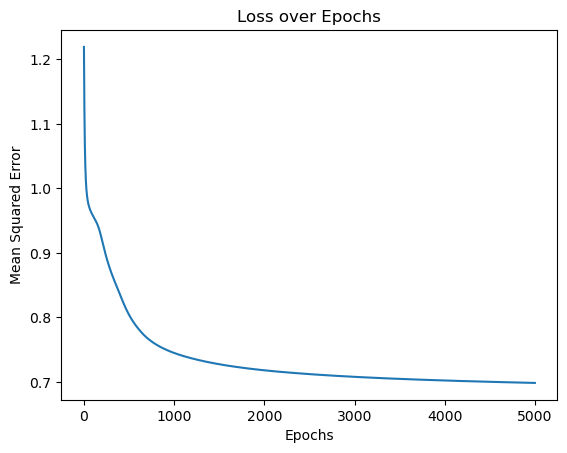


Feature Importance (Normalized):
the average Annual Relative Humidity: 0.0963
plant species: 0.1570
area: 0.1122
latitude: 0.0663
island: 0.0295
Metres from Sea Level: 0.1139
% Of landmass used for agriculture: 0.1585
Amount of forest lost 2023: 0.1381
% of urbanisation: 0.1282


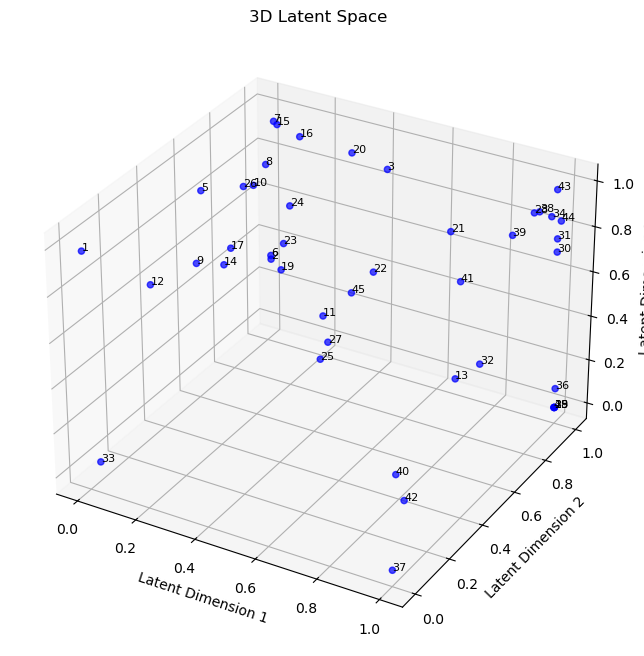

Converged at iteration 1


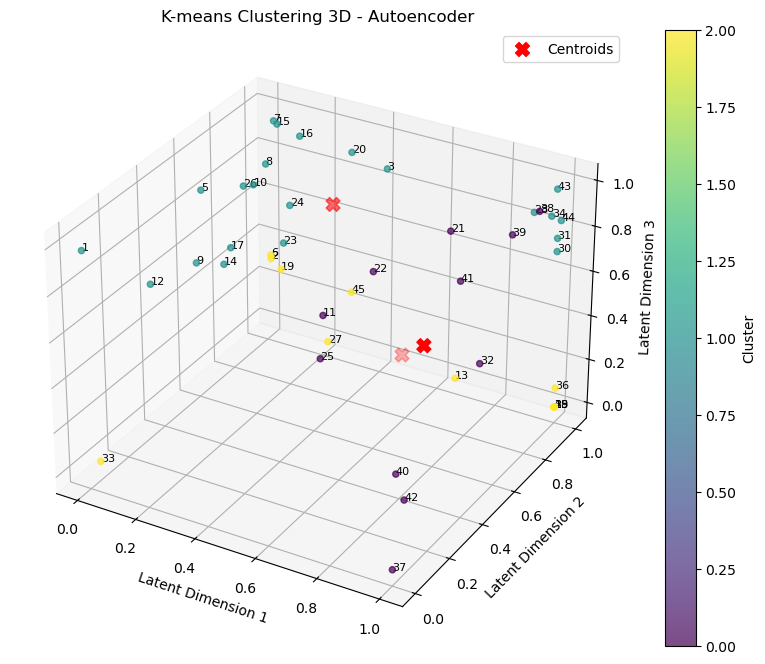

Cluster 1:
Greece - Number of species: 230
Portugal - Number of species: 147
Romania - Number of species: 180
Spain - Number of species: 243
Mexico State - Number of species: 325
Australia - Number of species: 398
Zambia - Number of species: 901
Tanzania - Number of species: 1583
South Africa - Number of species: 797
Cameroon - Number of species: 1593
India - Number of species: 1163

Cluster 2:
Austria - Number of species: 197
Bulgaria - Number of species: 211
Czech Republic - Number of species: 140
Estonia - Number of species: 98
Finland - Number of species: 110
France - Number of species: 244
Germany - Number of species: 178
Hungary - Number of species: 152
Italy - Number of species: 264
Latvia - Number of species: 105
Lithuania - Number of species: 114
Luxembourg - Number of species: 78
Poland - Number of species: 147
Slovakia - Number of species: 164
Slovenia - Number of species: 172
Sweden - Number of species: 108
Florida - Number of species: 193
Parana - Number of species: 689
Ki

In [36]:
AutoEncoders(data, num_species, numbers, countries, df)